# `geom_pointdensity()`

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


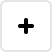
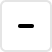
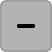
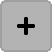
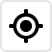
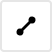
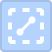
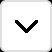
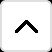
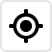
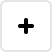
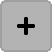
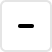
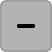
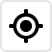
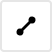
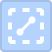
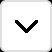
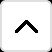
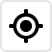

In [2]:
LetsPlot.setup_html()

In [3]:
df_full = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/diamonds.csv")
print(df_full.shape)
df = df_full.sample(1_500, random_state=42).reset_index(drop=True)
df.head()

(53940, 10)


carat        cut color clarity  depth  table  price     x     y     z
0   0.24      Ideal     G    VVS1   62.1   56.0    559  3.97  4.00  2.47
1   0.58  Very Good     F    VVS2   60.0   57.0   2201  5.44  5.42  3.26
2   0.40      Ideal     E    VVS2   62.1   55.0   1238  4.76  4.74  2.95
3   0.43    Premium     E    VVS2   60.8   57.0   1304  4.92  4.89  2.98
4   1.55      Ideal     E     SI2   62.3   55.0   6901  7.44  7.37  4.61

## Default Plot

In [4]:
ggplot(df_full, aes("carat", "price")) + geom_pointdensity(method='kde2d')

## Aesthetics

### `weight`

In [5]:
weighted_data = {
    'x': [0, 0, 1],
    'y': [0, 1, 0],
    'w': [2, 1, 1],
}

gggrid([
    ggplot(weighted_data, aes('x', 'y')) + \
        geom_pointdensity(adjust=50) + \
        ggtitle("method='neighbors', without weights"),
    ggplot(weighted_data, aes('x', 'y')) + \
        geom_pointdensity(aes(weight='w'), adjust=50) + \
        ggtitle("method='neighbors', with weights"),
    ggplot(weighted_data, aes('x', 'y')) + \
        geom_pointdensity(method='kde2d') + \
        ggtitle("method='kde2d', without weights"),
    ggplot(weighted_data, aes('x', 'y')) + \
        geom_pointdensity(aes(weight='w'), method='kde2d') + \
        ggtitle("method='kde2d', with weights"),
], ncol=2)

### Other aesthetics

In [6]:
ggplot(df, aes("carat", "price")) + \
    geom_pointdensity(aes(alpha="..density.."), color="black") + \
    ggtitle("Custom color and alpha")

In [7]:
ggplot(df, aes("carat", "price")) + \
    geom_pointdensity(aes(fill="..density.."), method='kde2d', color="black", shape=21) + \
    ggtitle("Custom shape, color and fill")

In [8]:
ggplot(df, aes("carat", "price")) + \
    geom_pointdensity(method='kde2d', shape=17, angle=90) + \
    ggtitle("Custom shape and angle")

In [9]:
ggplot(df, aes("carat", "price")) + \
    geom_pointdensity(aes(size="depth"), method='kde2d', alpha=.2) + \
    scale_size(range=[1, 5]) + \
    ggtitle("Custom size and alpha")

In [10]:
ggplot(df, aes("carat", "price")) + \
    geom_pointdensity(method='kde2d', shape=1, stroke=2, alpha=.5) + \
    ggtitle("Custom shape, stroke and alpha")

## Parameters

### Own Parameters

#### Unique Parameters

In [11]:
gggrid([
    ggplot(df, aes("carat", "price")) + geom_pointdensity() + ggtitle("Default method"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggtitle("method='kde2d'"),
], ncol=2)

#### Density-like Parameters

In [12]:
g = ggplot(df, aes("carat", "price")) + scale_color_continuous(low="darkgreen", high="tomato")

gggrid([
    g + geom_pointdensity(method='kde2d') + ggtitle("Default kernel"),
    g + geom_pointdensity(method='kde2d', kernel='cosine') + ggtitle("kernel='cosine'"),
    g + geom_pointdensity(method='kde2d', kernel='optcosine') + ggtitle("kernel='optcosine'"),
    g + geom_pointdensity(method='kde2d', kernel='rectangular') + ggtitle("kernel='rectangular'"),
    g + geom_pointdensity(method='kde2d', kernel='triangular') + ggtitle("kernel='triangular'"),
    g + geom_pointdensity(method='kde2d', kernel='biweight') + ggtitle("kernel='biweight'"),
    g + geom_pointdensity(method='kde2d', kernel='epanechikov') + ggtitle("kernel='epanechikov'"),
], ncol=3)

In [13]:
gggrid([
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggtitle("Default adjust"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d', adjust=10) + ggtitle("adjust=10"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d', adjust=.1) + ggtitle("adjust=0.1"),
], ncol=2)

In [14]:
gggrid([
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggtitle("Default bw"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d', bw='nrd0') + ggtitle("bw='nrd0'"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d', bw=[1, 5000]) + ggtitle("bw=[1, 5000]"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d', bw=[.02, 500]) + ggtitle("bw=[.02, 500]"),
], ncol=2)

In [15]:
gggrid([
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggtitle("Default n"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d', n=5) + ggtitle("n=5"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d', n=999) + ggtitle("n=999"),
], ncol=2)

### Standard Parameters

In [16]:
gggrid([
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggtitle("Default position"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d', position=position_nudge(y=5_000)) + \
        coord_cartesian(ylim=[5_000, 25_000]) + ggtitle("position=position_nudge(y=5_000)"),
])

In [17]:
gggrid([
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggtitle("Default show_legend"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d', show_legend=False) + ggtitle("show_legend=False"),
])

In [18]:
gggrid([
    ggplot(df, aes(alpha="..density..")) + \
        geom_pointdensity(aes("carat", "price"), method='kde2d') + \
        ggtitle("Default inherit_aes"),
    ggplot(df, aes(alpha="..density..")) + \
        geom_pointdensity(aes("carat", "price"), method='kde2d', inherit_aes=False) + \
        ggtitle("inherit_aes=False"),
])

In [19]:
gggrid([
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggtitle("Default manual_key"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d', manual_key="point density") + ggtitle('manual_key="point density"'),
])

In [20]:
gggrid([
    ggplot(df, aes("carat", "price")) + \
        geom_pointdensity(method='kde2d') + \
        coord_cartesian(xlim=[0, 5], ylim=[0, 20_000]) + \
        ggtitle("Default sampling"),
    ggplot(df, aes("carat", "price")) + \
        geom_pointdensity(method='kde2d', sampling=sampling_random(250, seed=42)) + \
        coord_cartesian(xlim=[0, 5], ylim=[0, 20_000]) + \
        ggtitle("sampling=sampling_random(250, seed=42)"),
])

In [21]:
pointdensity_tooltips = layer_tooltips().title("@cut diamond")\
                                        .line("position|(^x, ^y)")\
                                        .line("@|@..density..")\
                                        .line("count|@..count..")\
                                        .line("scaled|@..scaled..")
ggplot(df, aes("carat", "price")) + \
    geom_pointdensity(method='kde2d', tooltips=pointdensity_tooltips) + \
    ggtitle("Custom tooltips")

In [22]:
ggplot(df, aes("carat", "price")) + \
    geom_pointdensity(aes(paint_a="..density..", paint_b="..density.."),
                      method='kde2d', shape=21,
                      color_by='paint_a', fill_by='paint_b') + \
    scale_brewer('paint_a', palette="Reds") + \
    scale_brewer('paint_b', palette="Oranges") + \
    ggtitle("Use of color_by and fill_by")

## Stat

### `stat='identity'`

In [23]:
gggrid([
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggtitle("Default stat"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(stat='identity') + ggtitle("stat='identity'"),
])

### `'pointdensity'` Stat

In [24]:
gggrid([
    ggplot(df, aes("carat", "price")) + geom_bin2d() + ggtitle("geom_bin2d() with default stat"),
    ggplot(df, aes("carat", "price")) + geom_bin2d(aes(fill="..density.."), stat='pointdensity', method='kde2d', width=3, height=3, size=3) + ggtitle("geom_bin2d(stat='pointdensity')"),
])

## Interaction with other layers

### `ggmarginal()`

In [25]:
ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggmarginal("tr", layer=geom_density())

### `ggtb()`

In [26]:
ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggtb()

### Facets

In [27]:
ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + facet_grid(x="cut")

### Coordinate Systems

In [28]:
gggrid([
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + ggtitle("Default coordinate system"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + coord_flip() + ggtitle("coord_flip()"),
    ggplot(df, aes("carat", "price")) + geom_pointdensity(method='kde2d') + coord_polar() + ggtitle("coord_polar()"),
])

### Themes

In [29]:
ggplot(df, aes("carat", "price")) + \
    geom_pointdensity(method='kde2d') + \
    scale_color_brewer(palette="Oranges") + \
    theme_minimal() + \
    theme(legend_position='bottom') + \
    flavor_darcula()

## Tests

### Boundary Tests

In [30]:
tests = [
    {
        'title': "Empty data",
        'data': {
            'x': [],
            'y': [],
        }
    },
    {
        'title': "One element",
        'data': {
            'x': [0],
            'y': [0],
        }
    },
    {
        'title': "NaN's in data",
        'data': {
            'x': [0, np.nan, None, 1, 2],
            'y': [0, 3, 4, np.nan, None],
        }
    },
]

gggrid([
    ggplot(t['data'], aes('x', 'y')) + \
        geom_pointdensity() + \
        ggtitle(t['title'])
    for t in tests
], ncol=2)

### Emptiness Tests

In [31]:
def get_mapping(var):
    if var is None:
        return aes('x', 'y')
    else:
        return aes('x', 'y', color=var, fill=var)

p_working = lambda var: ggplot({'x': [0], 'y': [0]}, get_mapping(var))

p_no_data = lambda var: ggplot(mapping=aes('x', 'y', color=var, fill=var)) if var is not None else ggplot(mapping=aes('x', 'y'))

p_empty = lambda var: ggplot({'x': [], 'y': []}, get_mapping(var))

p_facet_nan = lambda var: ggplot({'x': [0, np.nan], 'y': [0, 0], 'g': ["A", "B"]}, get_mapping(var)) + facet_grid(x='g')

p_facet_cross = lambda var: ggplot({'x': [0, 0], 'y': [0, 0], 'g1': ["A", "B"], 'g2': ["C", "D"]}, get_mapping(var)) + facet_grid(x='g1', y='g2')

p_group = ggplot({'x': [0, np.nan], 'y': [0, 0], 'g': ["A", "B"]}, aes('x', 'y', color='g', fill='g'))

p_nan = lambda var: ggplot({'x': [np.nan], 'y': [np.nan]}, get_mapping(var))

p_lim = lambda var: ggplot({'x': [0], 'y': [0]}, get_mapping(var)) + xlim(1, 2)

gggrid([
    p_working("..density..") + geom_pointdensity(),
    p_no_data("..density..") + geom_pointdensity(),
    p_empty("..density..") + geom_pointdensity(),
    p_facet_nan("..density..") + geom_pointdensity(),
    p_facet_cross("..density..") + geom_pointdensity(),
    p_group + geom_pointdensity(),
    p_nan("..density..") + geom_pointdensity(),
    p_lim("..density..") + geom_pointdensity(),
], ncol=2)

### Big Data Tests

In [32]:
def get_big_data(n, seed=42):
    np.random.seed(seed)
    return {
        'x': np.random.normal(size=n),
        'y': np.random.normal(size=n),
    }

def get_big_data_plot(big_data, method):
    return ggplot(big_data, aes('x', 'y')) + \
        geom_pointdensity(method=method, show_legend=False) + \
        theme_void()

In [33]:
size_scale = 100
data = {'dataset_size': [], 'avg_time': [], 'method': []}
for method in ['neighbours', 'kde2d']:
    for i in range(1, 21):
        size = i * size_scale
        big_data = get_big_data(size)
        print(f"method={method}, size={size}")
        t = %timeit -r 10 -n 2 -o get_big_data_plot(big_data, method)._repr_html_()
        data['dataset_size'].append(size)
        data['avg_time'].append(t.average)
        data['method'].append(method)

method=neighbours, size=100
7.23 ms ± 143 μs per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=200
15 ms ± 365 μs per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=300
27.7 ms ± 586 μs per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=400
42.2 ms ± 679 μs per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=500
61.6 ms ± 1.13 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=600
85.3 ms ± 566 μs per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=700
112 ms ± 800 μs per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=800
141 ms ± 1.81 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=900
178 ms ± 1.45 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=1000
214 ms ± 2.07 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, si

In [34]:
ggplot(data, aes("dataset_size", "avg_time", color="method")) + geom_line() + geom_point() + ggsize(1000, 600)